Data Science Fundamentals: Python |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 11. | 
[Introduction to Matplotlib](./01-Introduction-To-Matplotlib.ipynb) |
[Simple Line Plots](./02-Simple-Line-Plots.ipynb) |
[Simple Scatter Plots](./03-Simple-Scatter-Plots.ipynb) |
[Errorbars](./04-Errorbars.ipynb) |
[Density Contour Plots](./05-Density-and-Contour-Plots.ipynb) |
[Histogram Binnings](./06-Histograms-and-Binnings.ipynb) |
[Customizing Legends](./07-Customizing-Legends.ipynb) |
[Customizing Colorbars](./08-Customizing-Colorbars.ipynb) |
[Multiple Subplots](./09-Multiple-Subplots.ipynb) |
[Text And Annotations](./10-Text-and-Annotation.ipynb) |
[Customizing Ticks](./11-Customizing-Ticks.ipynb) |
[Settings And Stylesheets](./12-Settings-and-Stylesheets.ipynb) |
[3D Plotting](./13-Three-Dimensional-Plotting.ipynb) |
[Geographic Data with Basemap](./14-Geographic-Data-With-Basemap.ipynb) |
[Seaborn](./15-Visualization-With-Seaborn.ipynb)

- - -

[Tutorials](./16-Tutorials.ipynb)

- - -

[Exercises](./17-Exercises.ipynb)


# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (see [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boiler-plate imports are done:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

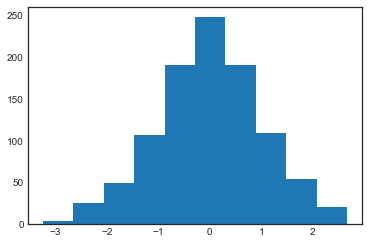

In [2]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

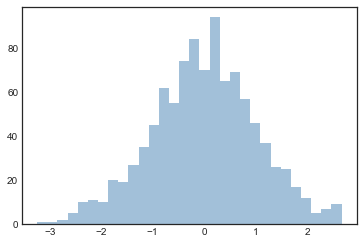

In [3]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

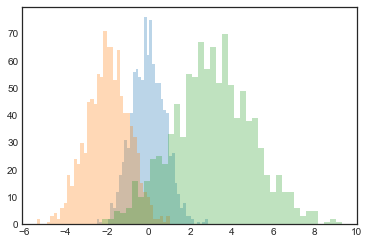

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [10]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 40 247 415 242  56]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

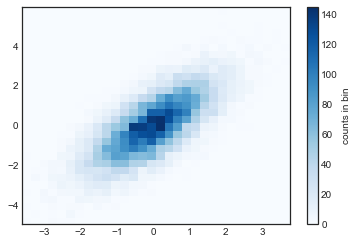

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

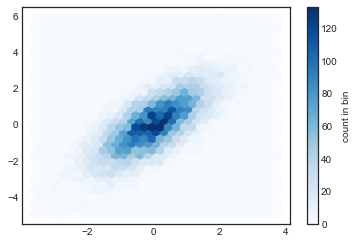

In [8]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

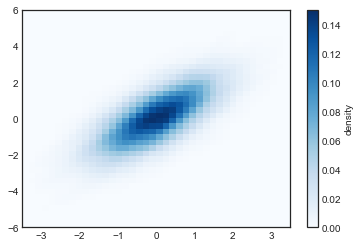

In [9]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast: ``gaussian_kde`` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more terse API for creating KDE-based visualizations.